In [1]:
from weaPoints import WeaPoints, WindDataType, CalculationMethod
import numpy as np
import xarray
import pandas

# Loading Points

In [2]:
# size = 200
# lon = np.around(np.random.uniform(6.0, 14.0, size=size),5)
# lat = np.around(np.random.uniform(48.0, 55.0, size=size),5)
# lat_lon_coor = np.stack((lat, lon), axis=1)
# level = np.around(np.random.uniform(120.0, 120.0, size=size),1)

size = 10
lon = np.around(np.linspace(6.0, 14.0, num=size),5)
lat = np.around(np.linspace(48.0, 55.0, num=size),5)
lon, lat = np.meshgrid(lon, lat)
lat_lon_coor = np.stack((lat.flatten(), lon.flatten()), axis=1)
level = np.around(np.random.uniform(120.0, 120.0, size=lat_lon_coor.shape[0]),1)

testPoints = WeaPoints(
    lat_lon_coor = lat_lon_coor,
    level = level,
    wea_types = ["test_wea"] * lat_lon_coor.shape[0],
    #interpolation_method = [InterpolationMethod.LINEAR] * lat_lon_coor.shape[0],
    _interpolated_power_curves = True,
)

testPoints.point_list[:5]

[_WeaPoint(lat_lon_coor=array([48.,  6.]), level=120.0, wea_type='test_wea', x_y_coor=[-352079.21479721257, -310032.7289459458]),
 _WeaPoint(lat_lon_coor=array([48.     ,  6.88889]), level=120.0, wea_type='test_wea', x_y_coor=[-286065.1888688968, -313881.4908363324]),
 _WeaPoint(lat_lon_coor=array([48.     ,  7.77778]), level=120.0, wea_type='test_wea', x_y_coor=[-220009.54185884254, -316933.717144552]),
 _WeaPoint(lat_lon_coor=array([48.     ,  8.66667]), level=120.0, wea_type='test_wea', x_y_coor=[-153921.88453966685, -319188.96378664864]),
 _WeaPoint(lat_lon_coor=array([48.     ,  9.55556]), level=120.0, wea_type='test_wea', x_y_coor=[-87811.8323413299, -320646.9026352977])]

# Get Time series

### 15 min TSnetCDF

Passed time_frame valid.
TSnetCDF data loaded.
Time period loaded.
Windpower turbine 1 complete
Windpower turbine 2 complete
Windpower turbine 3 complete
Windpower turbine 4 complete
Windpower turbine 5 complete
Windpower turbine 6 complete
Windpower turbine 7 complete
Windpower turbine 8 complete
Windpower turbine 9 complete
Windpower turbine 10 complete
Windpower turbine 11 complete
Windpower turbine 12 complete
Windpower turbine 13 complete
Windpower turbine 14 complete
Windpower turbine 15 complete
Windpower turbine 16 complete
Windpower turbine 17 complete
Windpower turbine 18 complete
Windpower turbine 19 complete
Windpower turbine 20 complete
Windpower turbine 21 complete
Windpower turbine 22 complete
Windpower turbine 23 complete
Windpower turbine 24 complete
Windpower turbine 25 complete
Windpower turbine 26 complete
Windpower turbine 27 complete
Windpower turbine 28 complete
Windpower turbine 29 complete
Windpower turbine 30 complete
Windpower turbine 31 complete
Windpower tu

<AxesSubplot:>

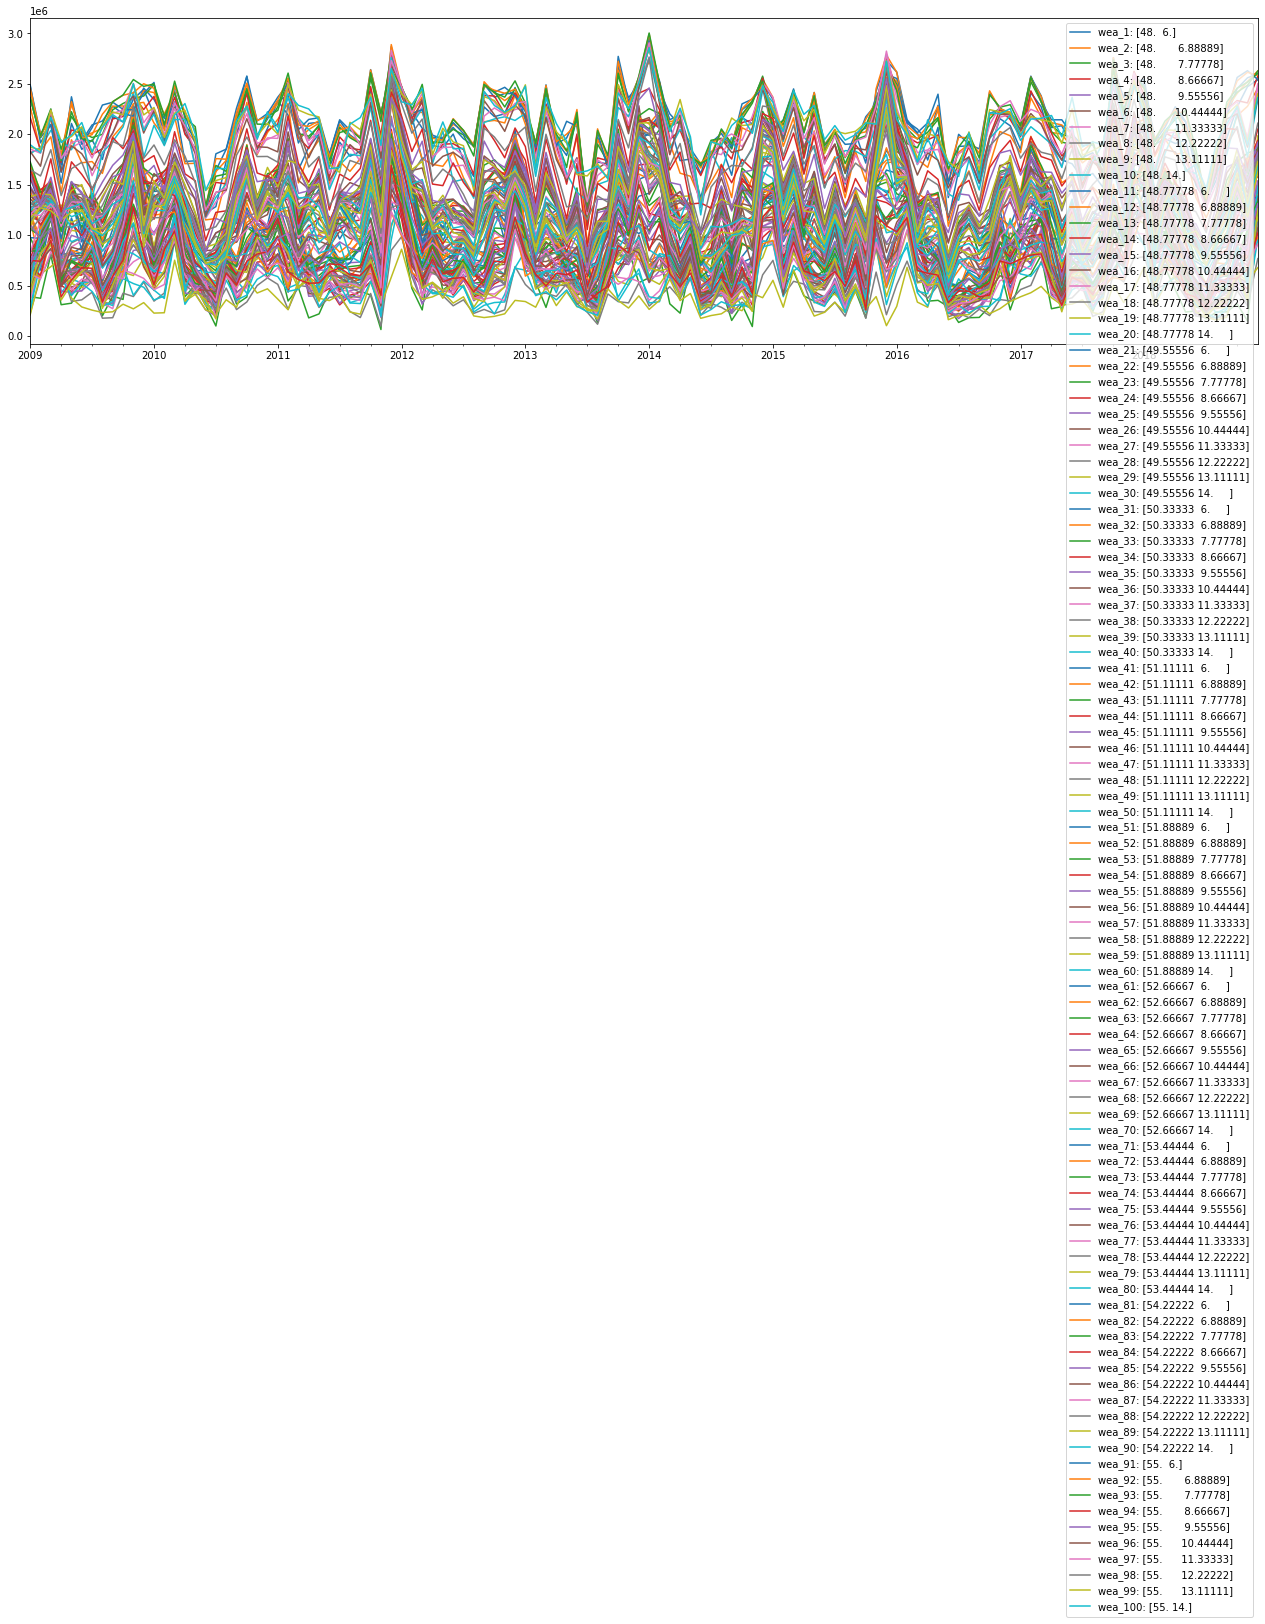

In [3]:
testPoints.get_windpower_out(wind_data_type=WindDataType.TSNETCDF, time_frame=[2009,"2018-12-31"])

Eout = {}
for num, point in enumerate(testPoints.point_list):
    Eout[f"wea_{num+1}: {point.lat_lon_coor}"] = point.power_time_series

df = pandas.DataFrame(data=Eout,index=testPoints.time_periode)

df.resample("1m").sum().plot(figsize=(22,6))

<AxesSubplot:>

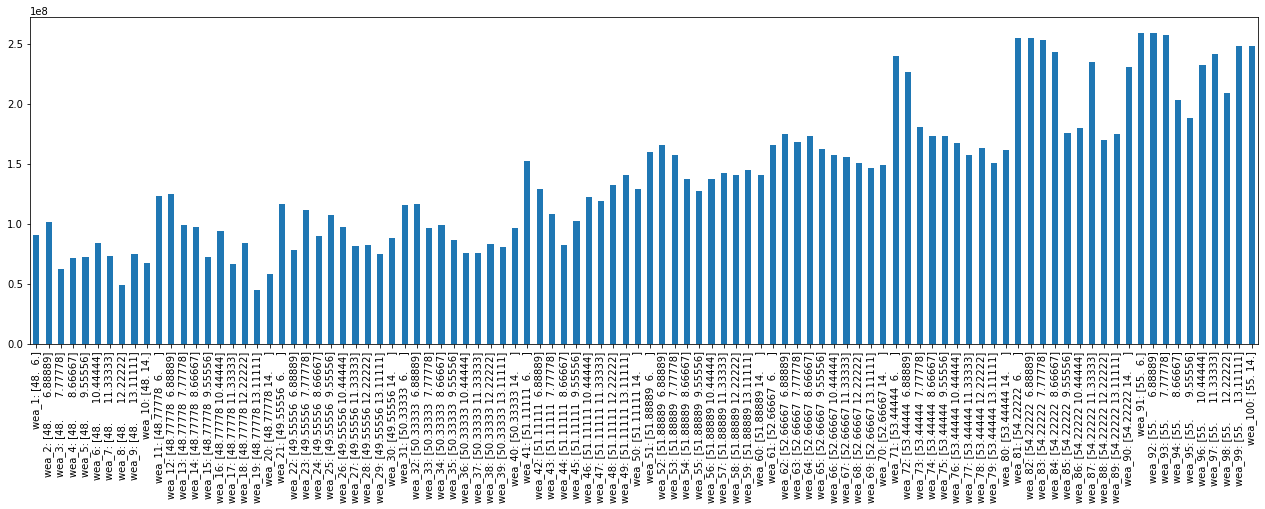

In [4]:
df.sum(axis=0).plot.bar(figsize=(22,6))

In [5]:
# df.to_xarray().to_netcdf("TSgrid_50x50_15min_10a.nc")

### 90m Mean

Passed time_frame valid.
mean90m data loaded.
rho
Windpower turbine 1 complete
rho
Windpower turbine 2 complete
rho
Windpower turbine 3 complete
rho
Windpower turbine 4 complete
rho
Windpower turbine 5 complete
rho
Windpower turbine 6 complete
rho
Windpower turbine 7 complete
rho
Windpower turbine 8 complete
rho
Windpower turbine 9 complete
rho
Windpower turbine 10 complete
rho
Windpower turbine 11 complete
rho
Windpower turbine 12 complete
rho
Windpower turbine 13 complete
rho
Windpower turbine 14 complete
rho
Windpower turbine 15 complete
rho
Windpower turbine 16 complete
rho
Windpower turbine 17 complete
rho
Windpower turbine 18 complete
rho
Windpower turbine 19 complete
rho
Windpower turbine 20 complete
rho
Windpower turbine 21 complete
rho
Windpower turbine 22 complete
rho
Windpower turbine 23 complete
rho
Windpower turbine 24 complete
rho
Windpower turbine 25 complete
rho
Windpower turbine 26 complete
rho
Windpower turbine 27 complete
rho
Windpower turbine 28 complete
rho
Windpow

<AxesSubplot:>

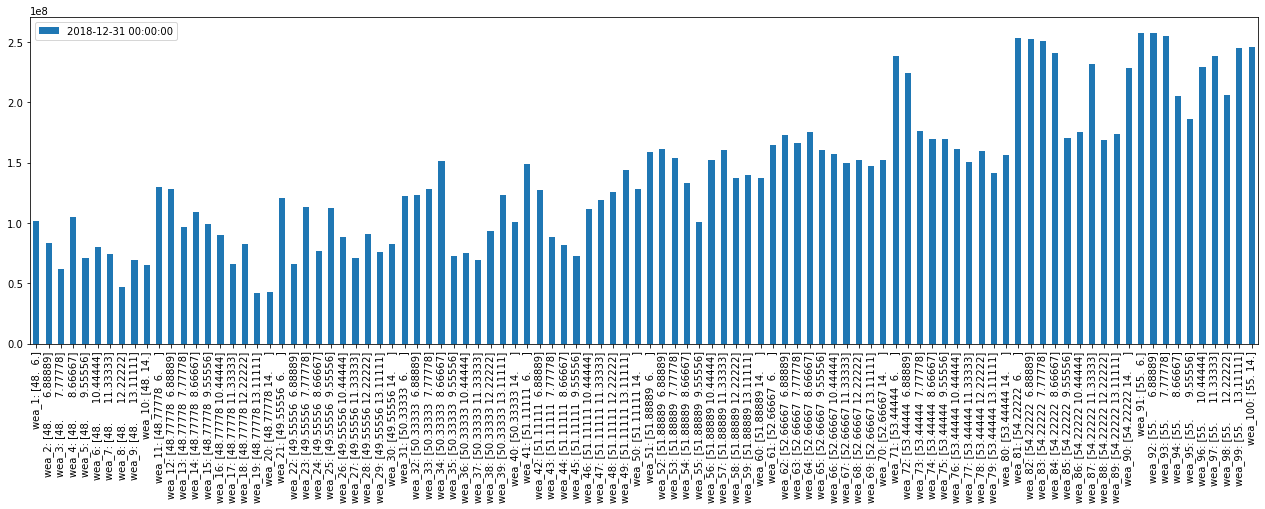

In [6]:
testPoints.get_windpower_out(wind_data_type=WindDataType.MEAN90M)
Eout = {}
for num, point in enumerate(testPoints.point_list):
    Eout[f"wea_{num+1}: {point.lat_lon_coor}"] = point.power_time_series

df_90mean = pandas.DataFrame(data=Eout,index=testPoints.time_periode)
df_90mean.head()#.resample("14d").mean().plot(figsize=(22,6))

df_90mean.transpose().plot.bar(figsize=(22,6))

In [7]:
# df_90mean.to_xarray().to_netcdf("TSgrid_50x50_90m_10a.nc")

### 3km Mean 10a

In [8]:
# testPoints.get_windpower_out(wind_data_type=WindDataType.MEAN3KM, calculation_method=CalculationMethod.WEIBULL)
# Eout = {}
# for num, point in enumerate(testPoints.point_list):
#     Eout[f"wea_{num+1}: {point.lat_lon_coor}"] = point.power_time_series

# df_90mean = pandas.DataFrame(data=Eout,index=testPoints.time_periode)
# df_90mean.head()#.resample("14d").mean().plot(figsize=(22,6))

# df_90mean.transpose().plot.bar(figsize=(22,6))

### Comparison

Text(0, 0.5, '10-Jahresertrag in TWh')

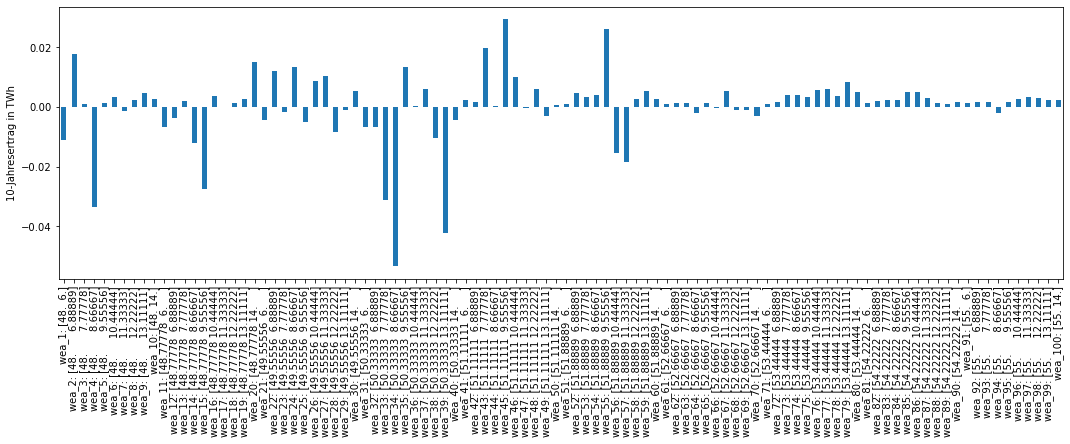

In [9]:
from datetime import datetime

comp = df_90mean.transpose()
comp["15min"] = df.sum(axis=0)
comp.columns = [i.strftime('%Y-%m-%d') if isinstance(i, datetime) else i for i in comp.columns]
comp = comp.rename(columns={comp.columns[0]:"wiebull_90m"})
comp = comp / 1000000000 # Wh zu TWh umrechnen
comp["diff"] = comp["15min"] - comp["wiebull_90m"]

# Zeilen nach Breitengrad sortieren
#points = [point.lat_lon_coor for point in testPoints.point_list]
#comp["lat"] = [point[0] for point in points]
#comp = comp.sort_values(by='lat', ascending=False)

ax = comp["diff"].plot.bar(figsize=(18,5))
ax.set_ylabel("10-Jahresertrag in TWh")

In [28]:
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as cx
import seaborn as sns

In [29]:
points = [point.lat_lon_coor for point in testPoints.point_list]
lat = [point[0] for point in points]
lon = [point[1] for point in points]

geodf = geopandas.GeoDataFrame(
    comp, geometry=geopandas.points_from_xy(lon, lat))

geodf["y"] = geodf.geometry.y
geodf["x"] = geodf.geometry.x

geodf = geodf.sort_values(by='y', ascending=False)

[]

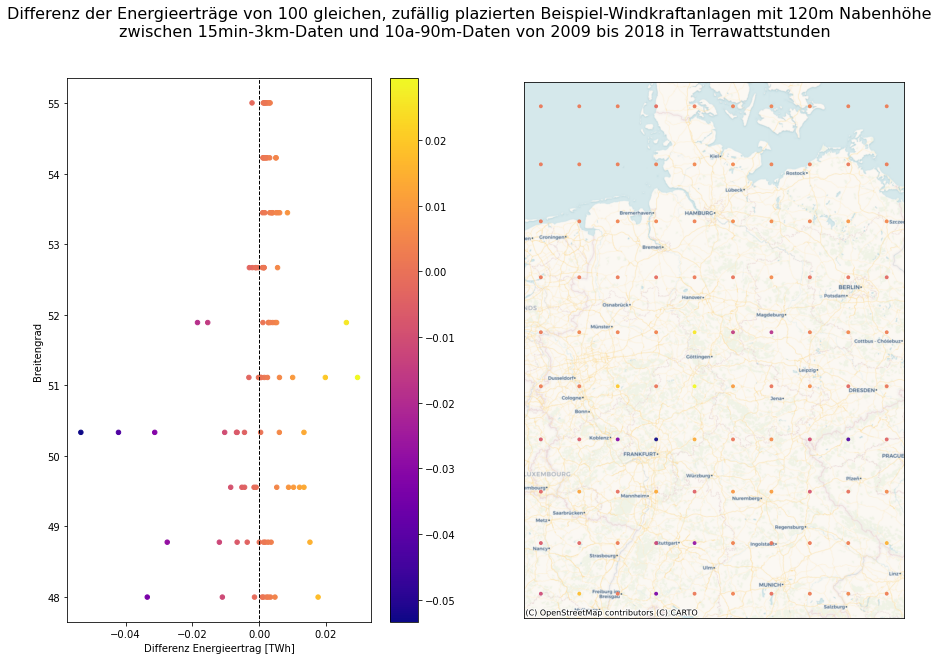

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.suptitle(f"Differenz der Energieerträge von {lat_lon_coor.shape[0]} gleichen, zufällig plazierten Beispiel-Windkraftanlagen mit 120m Nabenhöhe \n zwischen 15min-3km-Daten und 10a-90m-Daten von 2009 bis 2018 in Terrawattstunden", fontsize=16)
#SCATTER
geodf.plot(kind="scatter", x="diff", y="y", ax=ax[0], c=geodf["diff"], cmap='plasma')
y_limit = ax[0].get_ylim()
ax[0].plot([0,0],[geodf["y"].min()-5,geodf["y"].max()+5], linestyle="--", color="k", linewidth=1)
ax[0].set_ylim(y_limit)
ax[0].set_ylabel("Breitengrad")
ax[0].set_xlabel("Differenz Energieertrag [TWh]")

#MAP
geodf.crs = "EPSG:4326"
geodf = geodf.to_crs(epsg=3857)

geodf.plot(column='diff', ax=ax[1], cmap='plasma', s=8, alpha=.9)#, cax=cax)
cx.add_basemap(ax[1], source=cx.providers.CartoDB.Voyager)#, crs=geodf.crs)
ax[1].set_xticks([])
ax[1].set_yticks([])

#fig.savefig("/home/eouser/Documents/code/Windatlas/Diff150Anlagen.eps", format="eps")
#fig.savefig("/home/eouser/Documents/code/Windatlas/Diff150Anlagen.png", format="png")

[]

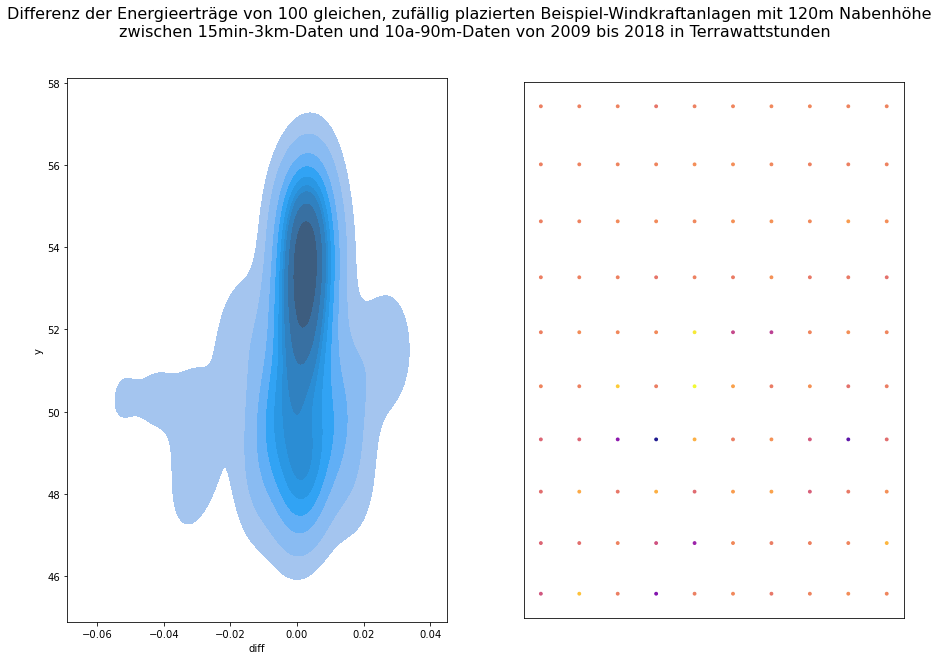

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.suptitle(f"Differenz der Energieerträge von {lat_lon_coor.shape[0]} gleichen, zufällig plazierten Beispiel-Windkraftanlagen mit 120m Nabenhöhe \n zwischen 15min-3km-Daten und 10a-90m-Daten von 2009 bis 2018 in Terrawattstunden", fontsize=16)

#HEXAPLOT
sns.kdeplot(ax=ax[0], x=geodf["diff"], y=geodf["y"], fill=True)

#MAP
#geodf.crs = "EPSG:4326"
#geodf = geodf.to_crs(epsg=3857)

geodf.plot(column='diff', ax=ax[1], cmap='plasma', s=8, alpha=.9)#, cax=cax)
#cx.add_basemap(ax[1], source=cx.providers.CartoDB.Voyager)#, crs=geodf.crs)
ax[1].set_xticks([])
ax[1].set_yticks([])

#fig.savefig("/home/eouser/Documents/code/Windatlas/Diff150Anlagen.eps", format="eps")
#fig.savefig("/home/eouser/Documents/code/Windatlas/Diff150Anlagen.png", format="png")

### 3km man

In [ ]:
path = "/uba/anemos_winddata/20191029_anemosDataFull/UBA-Windatlas/Statistics/10-Jahresmittel/histos.120m.2009-2018.nc"

xarray.open_dataset(path).interp(x=12.3,y=30.34).wbk

In [ ]:
path = "/uba/anemos_winddata/20191029_anemosDataFull/UBA-Windatlas/3arcsecs/D-3km.E5.3arcsecs.wbk.2009-2018.nc"

xarray.open_dataset(path, engine="h5netcdf").interp(x=6.27371826,y=47.94883789, level=120).wbk